<h1><center>Biological databases and online tools</center></h1>

# Introduction
Deux séquences nucléotidiques nous ont été fournies dont une des deux comporte une ou des mutations. Afin de définir les différences entre les deux séquences, nous allons dans un premier temps faire une traduction des deux séquences, un BLAST des séquences protéiques obtenues afin d'identifier le nom de la protéine saine puis nous allons effectuer un plot avec l'outil dotmatcher(http://www.bioinformatics.nl/emboss-explorer/) afin de visualiser les alignements, les indels et les gaps ainsi qu'un alignement global avec l'algorithme needleman-wunsch. On fera enfin une recherche sur uniprot afin de déterminer la pathologie associée à une des séquences.


In [2]:
from itertools import takewhile
import textwrap

def translate_dna(sequence):

    start = sequence.find('ATG')
    stop_codons = ('TAA', 'TGA', 'TAG')

    # Take sequence from the first start codon
    trimmed_sequence = sequence[start:]

    # Split it into triplets
    codons = [trimmed_sequence[i:i+3] for i in range(0, len(trimmed_sequence), 3)]

    # Take all codons until first stop codon
    coding_sequence  =  takewhile(lambda x: x not in stop_codons and len(x) == 3 ,
                                  codons)

    # Translate and join into string
    protein_sequence = ''.join([codontable[codon] for codon in coding_sequence])

    # This line assumes there is always stop codon in the sequence
    return "{0}".format(protein_sequence)





codontable = {'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S', 'TTC': 'F', 'TTT': 'F',
              'TTA': 'L', 'TTG': 'L', 'TAC': 'Y', 'TAT': 'Y', 'TAA': '*', 'TAG': '*',
              'TGC': 'C', 'TGT': 'C', 'TGA': '*', 'TGG': 'W', 'CTA': 'L', 'CTC': 'L',
              'CTG': 'L', 'CTT': 'L', 'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
              'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q', 'CGA': 'R', 'CGC': 'R',
              'CGG': 'R', 'CGT': 'R', 'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
              'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T', 'AAC': 'N', 'AAT': 'N',
              'AAA': 'K', 'AAG': 'K', 'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
              'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V', 'GCA': 'A', 'GCC': 'A',
              'GCG': 'A', 'GCT': 'A', 'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
              'GGA': 'G', 'GGC': 'G', 'GGG': 'G','GGT': 'G'}


print(textwrap.fill("secret1=" + translate_dna("ATGGATCAGAACAACAGCCTGCCACCTTACGCTCAGGGCTTGGCCTCCCCT\
CAGGGTGCCATGACTCCCGGAATCCCTATCTTTAGTCCAATGATGCCTTATGGCACTGGACTGACCCCACAGCCTATTCAGAAC\
ACCAATAGTCTGTCTATTTTGGAAGAGCAACAAAGGCAGCAGCAGCAACAACAACAGCAGCAGCAGCAGCAGCAGCAGCAACAG\
CAACAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAACAGGCAGTGGCAGCTGCAGCC\
GTTCAGCAGTCAACGTCCCAGCAGGCAACACAGGGAACCTCAGGCCAGGCACCACAGCTCTTCCACTCACAGACTCTCACAACT\
GCACCCTTGCCGGGCACCACTCCACTGTATCCCTCCCCCATGACTCCCATGACCCCCATCACTCCTGCCACGCCAGCTTCGGAG\
AGTTCTGGGATTGTACCGCAGCTGCAAAATATTGTATCCACAGTGAATCTTGGTTGTAAACTTGACCTAAAGACCATTGCACTT\
CGTGCCCGAAACGCCGAATATAATCCCAAGCGGTTTGCTGCGGTAATCATGAGGATAAGAGAGCCACGAACCACGGCACTGATT\
TTCAGTTCTGGGAAAATGGTGTGCACAGGAGCCAAGAGTGAAGAACAGTCCAGACTGGCAGCAAGAAAATATGCTAGAGTTGTA\
CAGAAGTTGGGTTTTCCAGCTAAGTTCTTGGACTTCAAGATTCAGAATATGGTGGGGAGCTGTGATGTGAAGTTTCCTATAAGG\
TTAGAAGGCCTTGTGCTCACCCACCAACAATTTAGTAGTTATGAGCCAGAGTTATTTCCTGGTTTAATCTACAGAATGATCAAA\
CCCAGAATTGTTCTCCTTATTTTTGTTTCTGGAAAAGTTGTATTAACAGGTGCTAAAGTCAGAGCAGAAATTTATGAAGCATTT\
GAAAACATCTACCCTATTCTAAAGGGATTCAGGAAGACGACGTAA"), 80))


print(textwrap.fill("secret2=" + translate_dna("ATGGATCAGAACAACAGCCTGCCACCTTACGCTCAGG\
GCTTGGCCTCCCCTCAGGGTGCCATGACTCCCG\
GAATCCCTATCTTTAGTCCAATGATGCCTTATGGCACTGGACTGACCCCACAGCCTATTCAGAACACCAA\
TAGTCTGTCTATTTTGGAAGAGCAACAAAGGCAGCAGCAGCAACAACAACAGCAGCAGCAGCAGCAGCAG\
CAGCAACAGCAACAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGC\
AACAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCA\
GCAGCAGCAGGCAGTGGCAGCTGCAGCCGTTCAGCAGTCAACGTCCCAGCAGGCAACACAGGGAACCTCA\
GGCCAGGCACCACAGCTCTTCCACTCACAGACTCTCACAACTGCACCCTTGCCGGGCACCACTCCACTGT\
ATCCCTCCCCCATGACTCCCATGACCCCCATCACTCCTGCCACGCCAGCTTCGGAGAGTTCTGGGATTGT\
ACCGCAGCTGCAAAATATTGTATCCACAGTGAATCTTGGTTGTAAACTTGACCTAAAGACCATTGCACTT\
CGTGCCCGAAACGCCGAATATAATCCCAAGCGGTTTGCTGCGGTAATCATGAGGATAAGAGAGCCACGAA\
CCACGGCACTGATTTTCAGTTCTGGGAAAATGGTGTGCACAGGAGCCAAGAGTGAAGAACAGTCCAGACT\
GGCAGCAAGAAAATATGCTAGAGTTGTACAGAAGTTGGGTTTTCCAGCTAAGTTCTTGGACTTCAAGATT\
CAGAATATGGTGGGGAGCTGTGATGTGAAGTTTCCTATAAGGTTAGAAGGCCTTGTGCTCACCCACCAAC\
AATTTAGTAGTTATGAGCCAGAGTTATTTCCTGGTTTAATCTACAGAATGATCAAACCCAGAATTGTTCT\
CCTTATTTTTGTTTCTGGAAAAGTTGTATTAACAGGTGCTAAAGTCAGAGCAGAAATTTATGAAGCATTT\
GAAAACATCTACCCTATTCTAAAGGGATTCAGGAAGACGACGTAA"), 80))

secret1=MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNTNSLSILEEQQRQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQAVAAAAVQQSTSQQATQGTSGQAPQLFHSQTLTTAPLPGTTPLYPSPMTPMTPITPA
TPASESSGIVPQLQNIVSTVNLGCKLDLKTIALRARNAEYNPKRFAAVIMRIREPRTTALIFSSGKMVCTGAKSEEQSRL
AARKYARVVQKLGFPAKFLDFKIQNMVGSCDVKFPIRLEGLVLTHQQFSSYEPELFPGLIYRMIKPRIVLLIFVSGKVVL
TGAKVRAEIYEAFENIYPILKGFRKTT
secret2=MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNTNSLSILEEQQRQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQAVAAAAVQQSTSQQATQGTSGQAPQLFHSQTL
TTAPLPGTTPLYPSPMTPMTPITPATPASESSGIVPQLQNIVSTVNLGCKLDLKTIALRARNAEYNPKRFAAVIMRIREP
RTTALIFSSGKMVCTGAKSEEQSRLAARKYARVVQKLGFPAKFLDFKIQNMVGSCDVKFPIRLEGLVLTHQQFSSYEPEL
FPGLIYRMIKPRIVLLIFVSGKVVLTGAKVRAEIYEAFENIYPILKGFRKTT


    On obtient donc nos deux séquences protéiques, on va donc faire un BLAST.

# BLAST

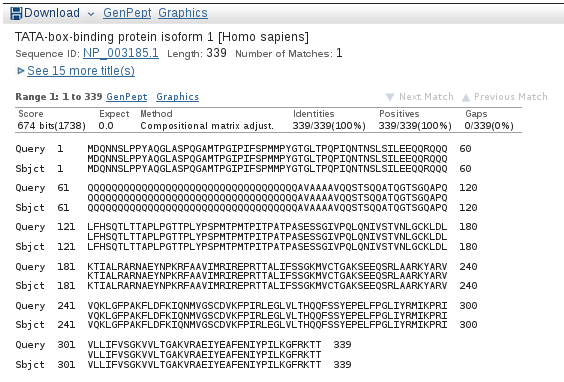

In [10]:
from IPython.display import Image
PATH = "/home/guiom/Bureau/"
Image(filename = PATH + "image1.png", width=900, height=900)

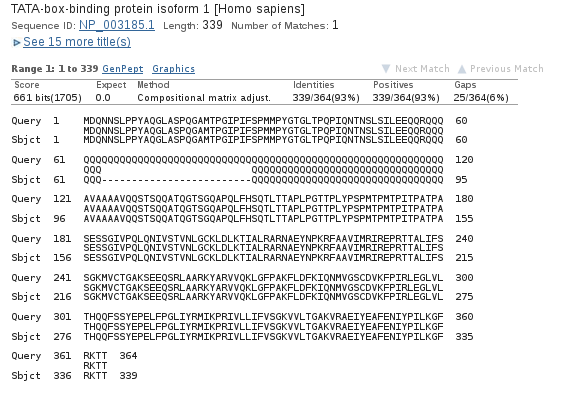

In [9]:
Image(filename = PATH + "image2.png", width=900, height=900)

    C'est donc la protéine de liaison à la TATA-box qui a été identifiée via BLAST. On effectue
    ensuite un plot avec l'outil dotmatcher.
    
# Dotmatcher    

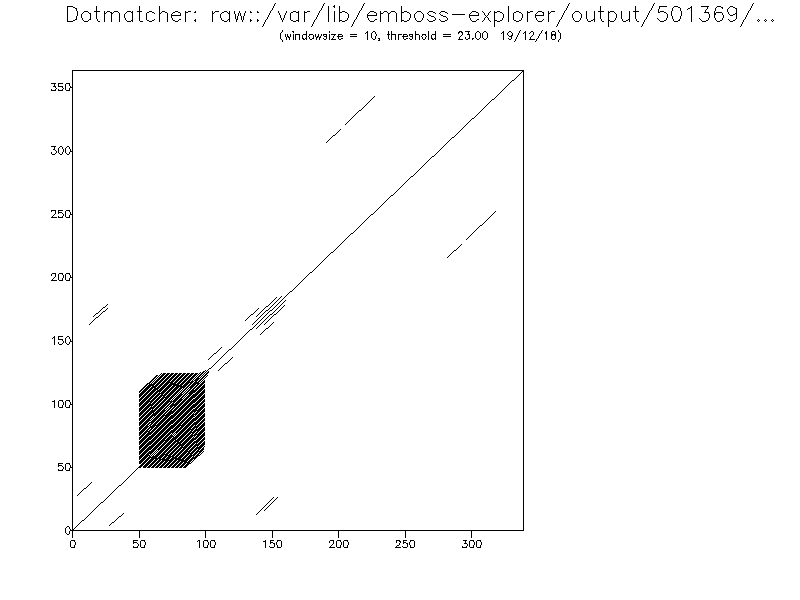

In [21]:
Image(filename = PATH + "dotmatcher.png", width=900, height=900)

    On voit bien qu'il y a une alignement des deux séquences sauf à un endroit approximativement
    entre le 50 ième et le 100 ieme acide aminé. On peut modifier le Threshold de 23 à 47 afin 
    d'affiner un peu:

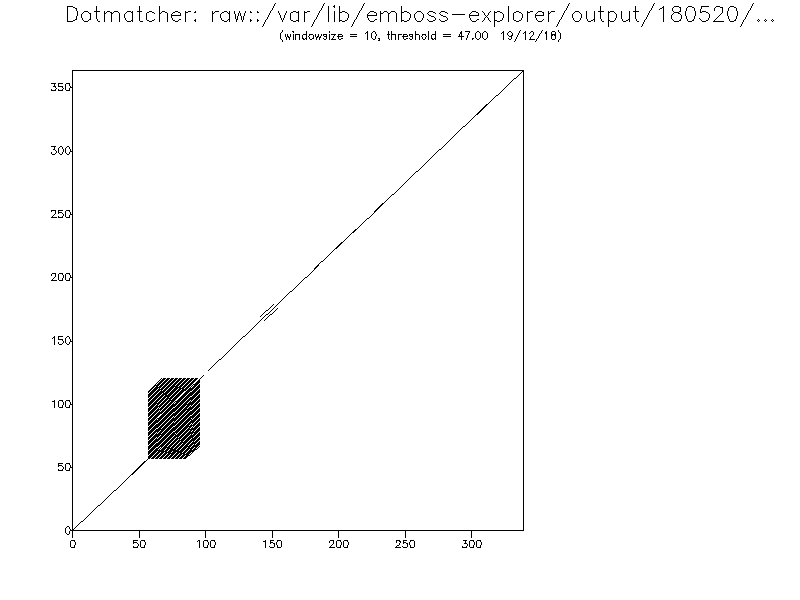

In [26]:
Image(filename = PATH + "dotmatcher2.png", width=900, height=900)

    On voit que les gaps ou insertions débutent plutôt proche du 60 ièm acide aminé. Afin de 
    déterminer exactement où se trouve les gaps/insertions, on va aligner les deux séquences 
    de manière globale avec l'algorithme Needleman-Wunsch.
    
# Needleman-Wunsch 

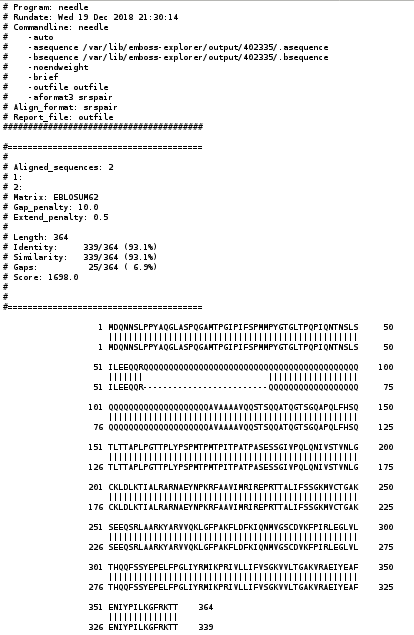

In [24]:
Image(filename = PATH + "image4.png", width=900, height=900)

    On voit donc que les gap/insertions se situent entre l'aa 58 et l'aa 82. Enfin, on cherche
    à déterminer s'il existe une maladie connue en allant voir sur uniprot.

# Uniprot

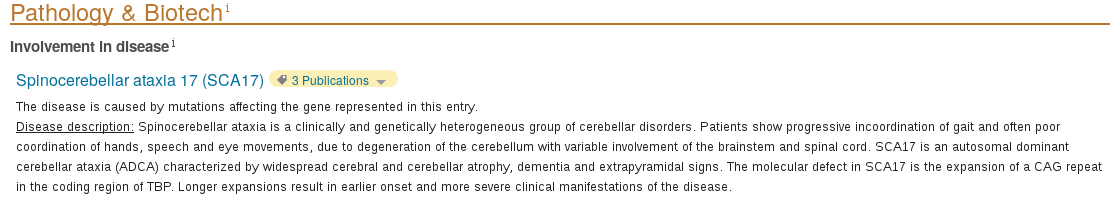

In [25]:
Image(filename = PATH + "image3.png", width=900, height=900)

    On voit donc que l'insertion de répétition de CAG (aa= Q) provoque l'ataxie 
    spinocerebelleuse 17. Le gène muté de la TBP provoque donc cette maladie plus 
    connue sous le nom de maladie de Hungtinton. On peut trouver ce nom plus connu 
    via OMIM, Online Mendelian Inheritance in Man.

# OMIM

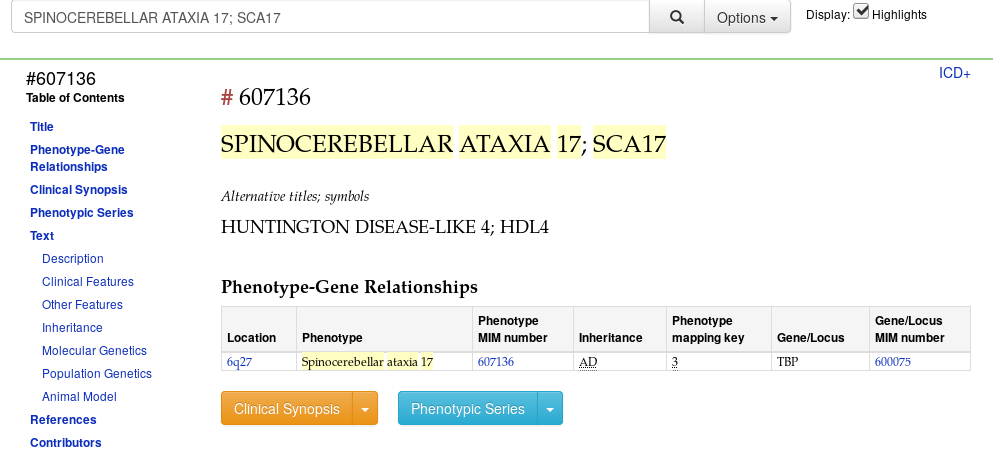

In [27]:
Image(filename = PATH + "image5.png", width=900, height=900)